In [1]:
# importing libraries 
import numpy as np 
import pandas as pd 

# visualisation libraries 
import matplotlib.pyplot as plt 
import seaborn as sb 

# XGBRegressor  ML model 
from xgboost import XGBRegressor

# Machine Learning libraries 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# ensure plot appear along with code cell
%matplotlib inline  

In [2]:
# Twiiter sentiment data for Apple stock from kaggle 
twitter_sentimental_df = pd.read_csv("C:\\Users\\saI\\Downloads\\AAPL (1).csv")
twitter_sentimental_df.head()

,date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430


In [3]:
# Apple stock data from yahoo 
stock_price_df = pd.read_csv("C:\\Users\\saI\\Downloads\\AAPL.csv")
stock_price_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.185045,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.578985,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.117548,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.141886,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.258965,283192000


In [4]:
# renaming date from to Date beacuse one data contain column name as date while other's column name is Date 
twitter_sentimental_df.rename(columns={'date':'Date'},inplace=True)

In [5]:
# Dropping null values from data 
twitter_sentimental_df = twitter_sentimental_df.dropna(axis=1)
twitter_sentimental_df.shape

(1341, 3)

In [6]:
# merging two data using comman column 'Date'
merged_df = stock_price_df.merge(twitter_sentimental_df,on="Date")
merged_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.185045,270597600,0.070389,1133
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.578985,223164000,0.133635,1430
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.117548,273829600,0.072042,1949
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.141886,324377600,0.074369,2289
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.258965,283192000,0.051595,2235


In [7]:
# redefining dataframe with only those features with useful feature only 
df = merged_df[['Date','Adj Close','ts_polarity','twitter_volume']]
df.head()

,Date,Adj Close,ts_polarity,twitter_volume
0,2016-01-04,24.185045,0.070389,1133
1,2016-01-05,23.578985,0.133635,1430
2,2016-01-06,23.117548,0.072042,1949
3,2016-01-07,22.141886,0.074369,2289
4,2016-01-08,22.258965,0.051595,2235


In [8]:
df.shape

(922, 4)

In [9]:
df.describe()

,Adj Close,ts_polarity,twitter_volume
count,922.000000,922.000000,922.000000
mean,37.082343,0.098588,1139.485900
std,9.665127,0.047102,736.596794
min,20.978710,-0.061656,73.000000
25%,27.160127,0.068843,783.250000
50%,37.943664,0.101830,987.000000
75%,44.820825,0.129126,1257.750000
max,55.972591,0.274161,7871.000000


In [10]:
df.columns

Index(['Date', 'Adj Close', 'ts_polarity', 'twitter_volume'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            922 non-null    object 
 1   Adj Close       922 non-null    float64
 2   ts_polarity     922 non-null    float64
 3   twitter_volume  922 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 36.0+ KB


In [12]:
# setting date as index of our DataFrame
df.set_index('Date',inplace = True)
df

,Adj Close,ts_polarity,twitter_volume
Date,,,
2016-01-04,24.185045,0.070389,1133
2016-01-05,23.578985,0.133635,1430
2016-01-06,23.117548,0.072042,1949
2016-01-07,22.141886,0.074369,2289
2016-01-08,22.258965,0.051595,2235
...,...,...,...
2019-08-26,50.575821,0.072340,888
2019-08-27,50.005135,0.117541,962
2019-08-28,50.340687,0.061477,895


In [13]:
# pct change based on Adj close value (this is in built function like .diff() )
df["Pct_change"] = df["Adj Close"].pct_change()

# drop null values [ beacuse first column dosen't have previous value for substraction]
df.dropna(inplace= True)
df.head()

C:\Users\saI\AppData\Local\Temp\ipykernel_10116\2747309194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pct_change"] = df["Adj Close"].pct_change()
C:\Users\saI\AppData\Local\Temp\ipykernel_10116\2747309194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace= True)


,Adj Close,ts_polarity,twitter_volume,Pct_change
Date,,,,
2016-01-05,23.578985,0.133635,1430,-0.025059
2016-01-06,23.117548,0.072042,1949,-0.019570
2016-01-07,22.141886,0.074369,2289,-0.042204
2016-01-08,22.258965,0.051595,2235,0.005288
2016-01-11,22.619385,0.019443,1222,0.016192


In [14]:
# Adding stock trend as new column 1 if Adj close is higher than previous day else 0 
Rise = 1
Fall = 0 
df['Stock Trend'] = np.where(df['Pct_change']>0,Rise,Fall)
df.head()

C:\Users\saI\AppData\Local\Temp\ipykernel_10116\3616877961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stock Trend'] = np.where(df['Pct_change']>0,Rise,Fall)


,Adj Close,ts_polarity,twitter_volume,Pct_change,Stock Trend
Date,,,,,
2016-01-05,23.578985,0.133635,1430,-0.025059,0
2016-01-06,23.117548,0.072042,1949,-0.019570,0
2016-01-07,22.141886,0.074369,2289,-0.042204,0
2016-01-08,22.258965,0.051595,2235,0.005288,1
2016-01-11,22.619385,0.019443,1222,0.016192,1


In [15]:
df['Stock Trend'].value_counts()

1    494
0    427
Name: Stock Trend, dtype: int64

In [16]:
# result in % 
df['Stock Trend'].value_counts(normalize = True)

1    0.536374
0    0.463626
Name: Stock Trend, dtype: float64

C:\Users\saI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stock Trend', ylabel='count'>

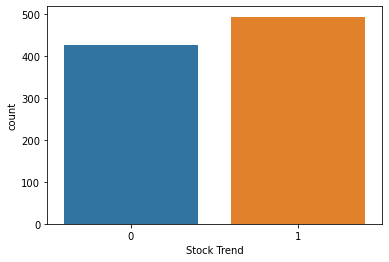

In [17]:
sb.countplot(df['Stock Trend'])

In [18]:
# Here we are defining  function "w_d" this function will accepts the column number for the features (X) and the target (y)




def w_d(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    
    
   
    X_close =    []       # creating emplty list for X_close, X_polarity, X_volume and y
    X_polarity = []
    X_volume =   []
    y =          []
    for i in range(len(df) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        # using append add values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

 #  hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array


In [19]:
df.head()

,Adj Close,ts_polarity,twitter_volume,Pct_change,Stock Trend
Date,,,,,
2016-01-05,23.578985,0.133635,1430,-0.025059,0
2016-01-06,23.117548,0.072042,1949,-0.019570,0
2016-01-07,22.141886,0.074369,2289,-0.042204,0
2016-01-08,22.258965,0.051595,2235,0.005288,1
2016-01-11,22.619385,0.019443,1222,0.016192,1


In [20]:
# Predict Closing Prices using a 5 day window of previous closing prices
window_size = 5

# Column index 0 to Adj Close, 1 to ts_polarity & 2 to twitter_volume column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number   = 0
X, y = w_d(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)


In [21]:
# spliting our data for training & testing 
SPLIT  = int(len(X)*0.7)


X_train = X[: SPLIT]
X_test =  X[SPLIT:]
y_train = y[:SPLIT]
y_test =  y[SPLIT:]

In [22]:
# scaling  data between 0 and 1 using MinMaxScaler

x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# 1.Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# 2.Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)


# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [23]:
# model XGB regressor 
model = XGBRegressor()

In [24]:
# Evaluation OF Model  
model.fit(X_train,y_train.ravel())
# .ravel() used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [25]:
# Prediction of Model 

predicted = model.predict(X_test)

# defining root mean squre error
score1 =  np.sqrt(metrics.mean_squared_error(y_test, predicted))

# r^2 value - Closer the value to 1 more accuratly our model perform
score2 = metrics.r2_score(y_test, predicted)

print('r square value',score2)
print('root mean sqaure error',score1)

# Both RMSE and R2 quantify how well a regression model fits a dataset. The RMSE tells us how well a regression model 
# can predict the value of the response variable in absolute terms while R2 tells us how well a model can predict the
# value of the response variable in percentage terms.

r square value 0.9463854019689375
root mean sqaure error 0.05470275761831755


In [26]:
# recovering original price inspite of scaled

predicted_price = y_test_scaler.inverse_transform(predicted.reshape(-1,1))
actual_price = y_test_scaler.inverse_transform(y_test.reshape(-1,1))

In [27]:
# Create a DataFrame of ACtual &  Predicted stock price 
stocks = pd.DataFrame({
    "Actual": actual_price.ravel(),
    "Predicted": predicted_price.ravel()
}, 
    index = df.index[-len(actual_price): ])   # here -ve sign is to matchong length of index and actual price
stocks.head()

,Actual,Predicted
Date,,
2018-07-30,45.644005,45.774765
2018-07-31,45.735340,45.877380
2018-08-01,48.429611,45.555496
2018-08-02,49.845245,48.467007
2018-08-03,49.989452,50.350338


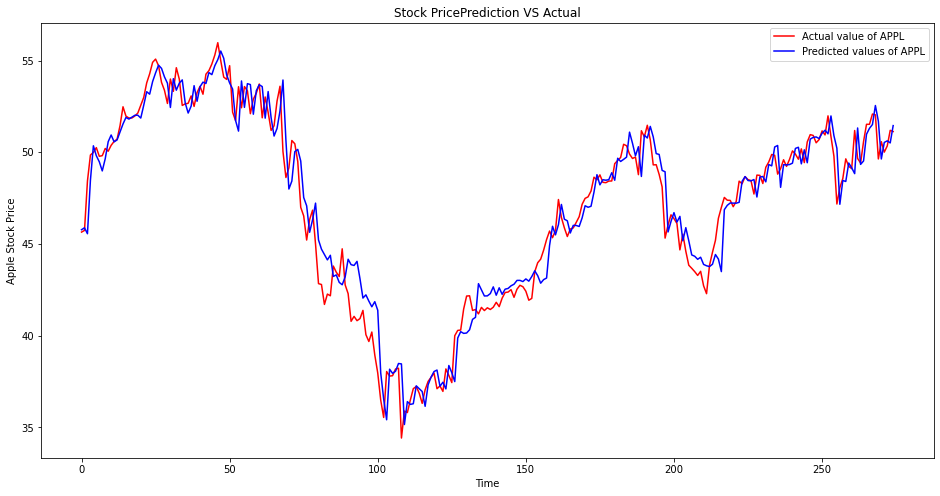

In [28]:
# Plot the actual vs predicted stock price
plt.figure(figsize=(16,8))
plt.plot(actual_price,color='red',label = 'Actual value of APPL')
plt.plot(predicted_price,color='blue',label = 'Predicted values of APPL')
plt.title('Stock PricePrediction VS Actual')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [29]:
stocks['difference'] = stocks.Actual - stocks.Predicted
stocks

,Actual,Predicted,difference
Date,,,
2018-07-30,45.644005,45.774765,-0.130760
2018-07-31,45.735340,45.877380,-0.142040
2018-08-01,48.429611,45.555496,2.874115
2018-08-02,49.845245,48.467007,1.378238
2018-08-03,49.989452,50.350338,-0.360886
...,...,...,...
2019-08-26,50.575821,49.631332,0.944489
2019-08-27,50.005135,50.534645,-0.529510
2019-08-28,50.340687,50.619072,-0.278385


In [30]:
stocks.difference.sort_values().tail()

Date
2019-05-01    2.492542
2019-01-30    2.503155
2018-12-26    2.629642
2018-08-01    2.874115
2019-06-10    3.500710
Name: difference, dtype: float64